## Importing Libraries and Data Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("../data/raw/synthetic_dynamic_pricing_data.csv")

In [3]:
# Get a summary of the dataset
print(f"Loaded {df.shape[0]} records and {df.shape[1]} columns.")

Loaded 5000 records and 10 columns.


In [4]:
# Display the first 10 rows of the DataFrame
display(df.head())

,Product_ID,Category,Current_Price,Competitor_Price,Demand_Level,Season,Day_of_Week,Units_Sold,Stock,Rating
0,P1000,Clothing,916.51,1376.46,High,Monsoon,Friday,82,863,2.31
1,P1001,Sports,587.32,1692.79,Low,Winter,Saturday,21,388,1.05
2,P1002,Toys,1262.98,495.52,Low,Festival,Wednesday,179,470,2.57
3,P1003,Clothing,1985.26,1739.53,Low,Summer,Sunday,498,65,3.04
4,P1004,Home Appliances,803.33,114.98,High,Autumn,Thursday,398,816,1.43


In [5]:
# Basic statistics for numeric columns
print(df.describe())

       Current_Price  Competitor_Price   Units_Sold        Stock       Rating
count    5000.000000       5000.000000  5000.000000  5000.000000  5000.000000
mean     1023.366576       1023.432192   248.652000   504.898400     2.973786
std       561.188908        561.950524   145.017281   284.860924     1.149353
min        50.360000         50.230000     1.000000    10.000000     1.000000
25%       545.810000        549.350000   121.000000   257.000000     1.970000
50%      1031.070000       1022.430000   246.000000   506.000000     2.965000
75%      1507.862500       1504.667500   375.000000   748.000000     3.970000
max      1999.710000       1999.500000   499.000000   999.000000     5.000000


In [6]:
# Check the data types of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_ID        5000 non-null   object 
 1   Category          5000 non-null   object 
 2   Current_Price     5000 non-null   float64
 3   Competitor_Price  5000 non-null   float64
 4   Demand_Level      5000 non-null   object 
 5   Season            5000 non-null   object 
 6   Day_of_Week       5000 non-null   object 
 7   Units_Sold        5000 non-null   int64  
 8   Stock             5000 non-null   int64  
 9   Rating            5000 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 390.8+ KB
None


In [7]:
# Check datatypes of each column
print(df.dtypes)

Product_ID           object
Category             object
Current_Price       float64
Competitor_Price    float64
Demand_Level         object
Season               object
Day_of_Week          object
Units_Sold            int64
Stock                 int64
Rating              float64
dtype: object


In [8]:
# Display Names Of Columns
df.columns.tolist()

['Product_ID',
 'Category',
 'Current_Price',
 'Competitor_Price',
 'Demand_Level',
 'Season',
 'Day_of_Week',
 'Units_Sold',
 'Stock',
 'Rating']

## Data Preprocessing & Cleaning

In [9]:
# Checking for missing values
print("Missing NULL values in the dataset:")
print(df.isnull().sum())

Missing NULL values in the dataset:
Product_ID          0
Category            0
Current_Price       0
Competitor_Price    0
Demand_Level        0
Season              0
Day_of_Week         0
Units_Sold          0
Stock               0
Rating              0
dtype: int64


In [10]:
# Checking for NaN values
print("Missing N/A values in the dataset:")
print(df.isna().sum())

Missing N/A values in the dataset:
Product_ID          0
Category            0
Current_Price       0
Competitor_Price    0
Demand_Level        0
Season              0
Day_of_Week         0
Units_Sold          0
Stock               0
Rating              0
dtype: int64


In [11]:
duplicates = df.duplicated()

# Number of Duplicates in the dataset
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [12]:
# Count unique values for categorical columns

for col in ["Category", "Demand_Level", "Season", "Day_of_Week"]:
    print(f"{col} unique values:")
    print(df[col].value_counts())
    print()

Category unique values:
Category
Sports             747
Toys               738
Books              735
Beauty             712
Electronics        694
Home Appliances    691
Clothing           683
Name: count, dtype: int64

Demand_Level unique values:
Demand_Level
Medium    1702
High      1650
Low       1648
Name: count, dtype: int64

Season unique values:
Season
Autumn      890
Winter      832
Festival    829
Monsoon     817
Summer      816
Spring      816
Name: count, dtype: int64

Day_of_Week unique values:
Day_of_Week
Friday       778
Thursday     744
Sunday       722
Monday       706
Saturday     702
Wednesday    679
Tuesday      669
Name: count, dtype: int64



In [13]:
# If there are missing values, fill them (example: fill numeric with median, categorical with mode)

'''
num_cols = ["Current_Price", "Competitor_Price", "Units_Sold", "Stock"]

# Fill missing numeric values with median
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = ["Category", "Demand_Level", "Season", "Day_of_Week"]

# Fill missing categorical values with mode
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
'''

'\nnum_cols = ["Current_Price", "Competitor_Price", "Units_Sold", "Stock"]\n\n# Fill missing numeric values with median\ndf[num_cols] = df[num_cols].fillna(df[num_cols].median())\n\ncat_cols = ["Category", "Demand_Level", "Season", "Day_of_Week"]\n\n# Fill missing categorical values with mode\nfor col in cat_cols:\n    df[col] = df[col].fillna(df[col].mode()[0])\n'

## Data Exploration

In [14]:
# Set plot style
sns.set(style='whitegrid')

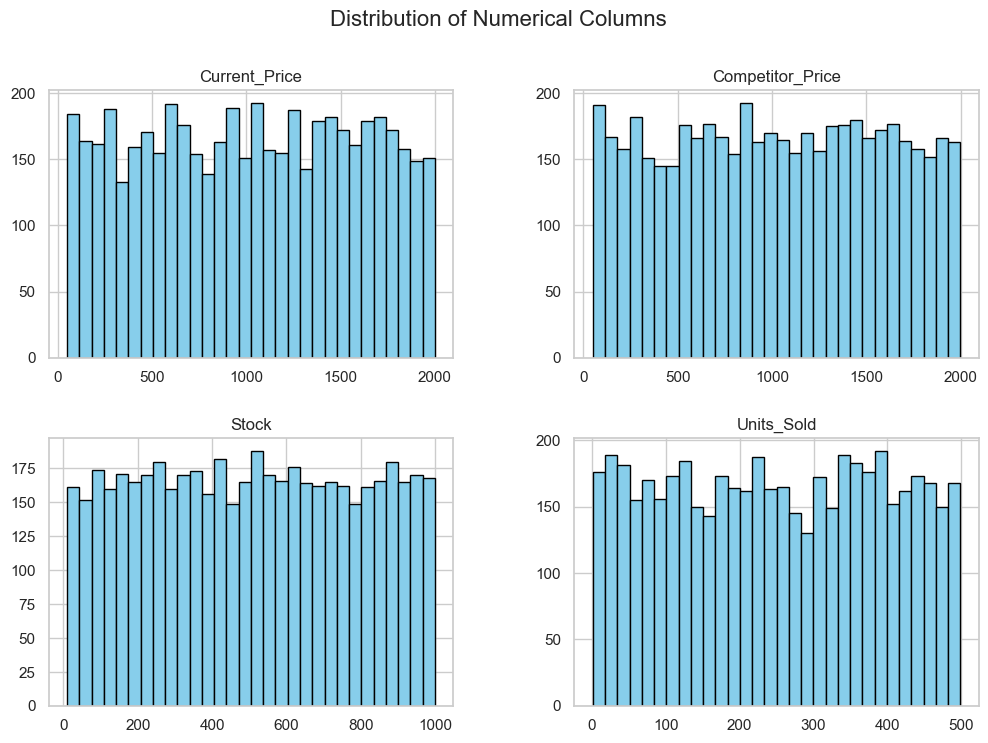

In [15]:
# Histograms for key numeric features
numerical_cols = ['Current_Price', 'Competitor_Price', 'Stock', 'Units_Sold']

df[numerical_cols].hist(bins=30, layout=(2,2), figsize=(12,8), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Columns", fontsize=16)
plt.show()

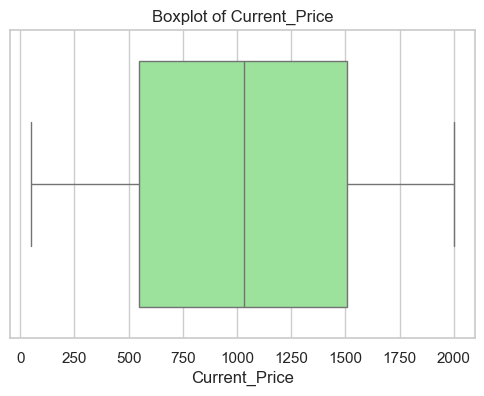

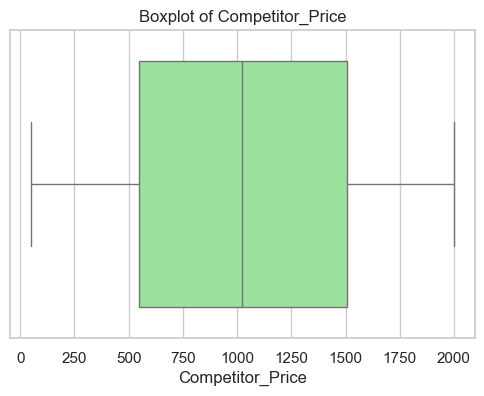

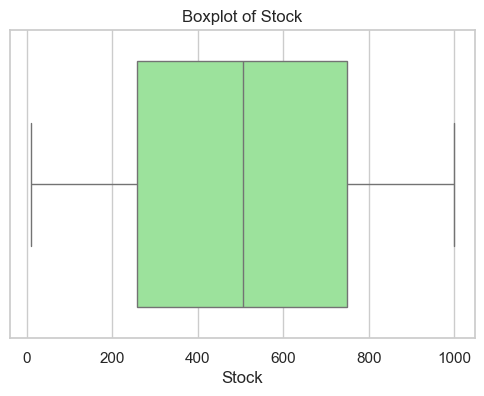

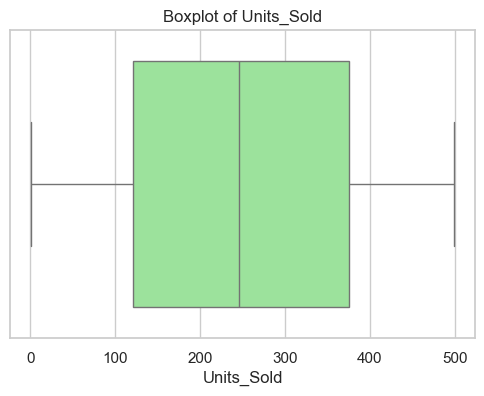

In [16]:
# Boxplots to check outliers
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.show()

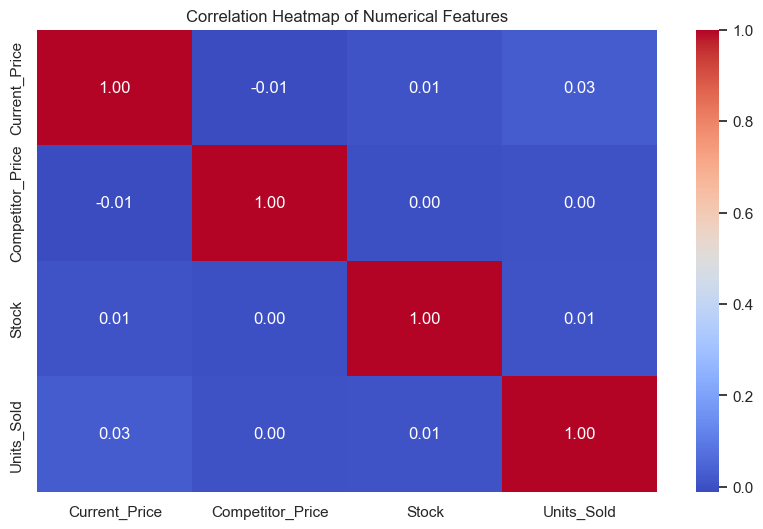

In [17]:
# Correlation heatmap for numeric features
plt.figure(figsize=(10,6))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

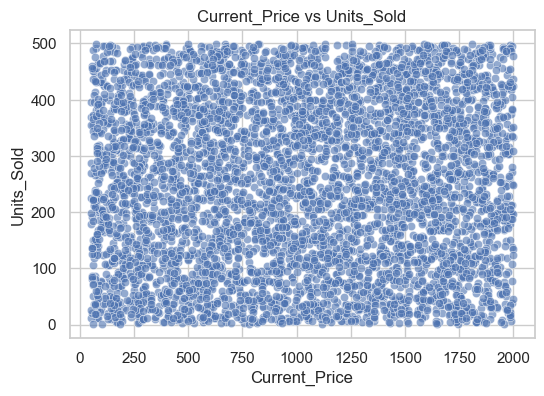

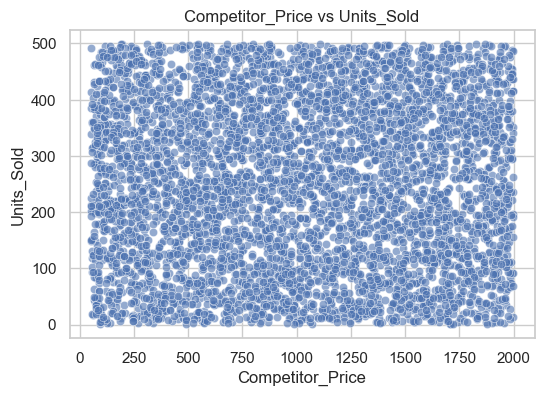

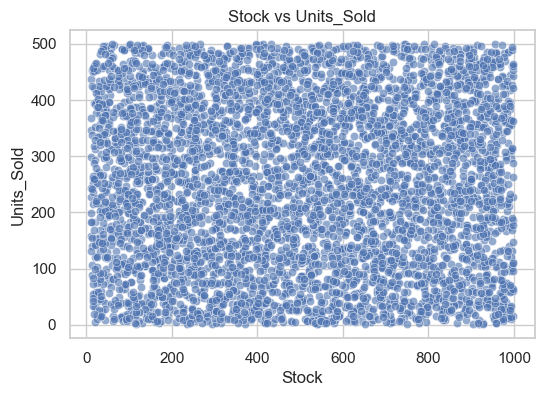

In [18]:
# Scatter plots between numerical features
for col in numerical_cols:
    if col != 'Units_Sold':
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=df[col], y=df['Units_Sold'], alpha=0.6)
        plt.title(f'{col} vs Units_Sold')
        plt.show()

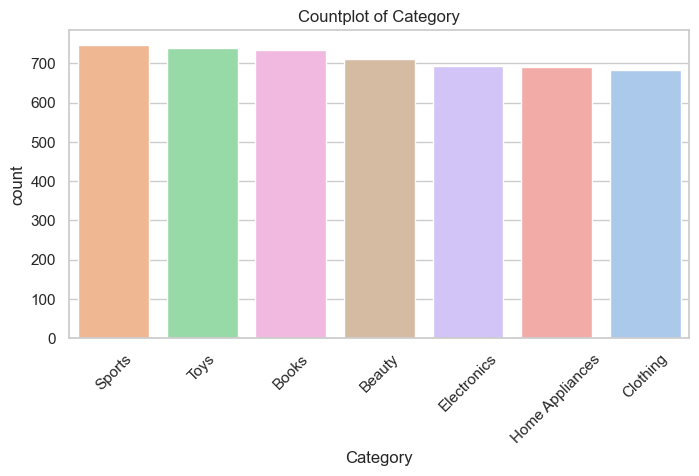

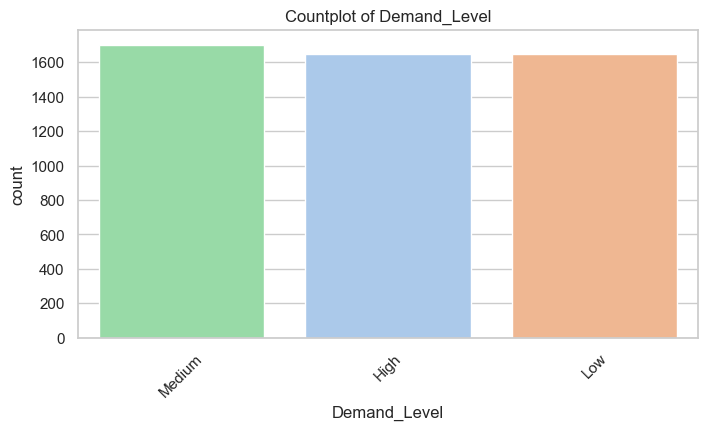

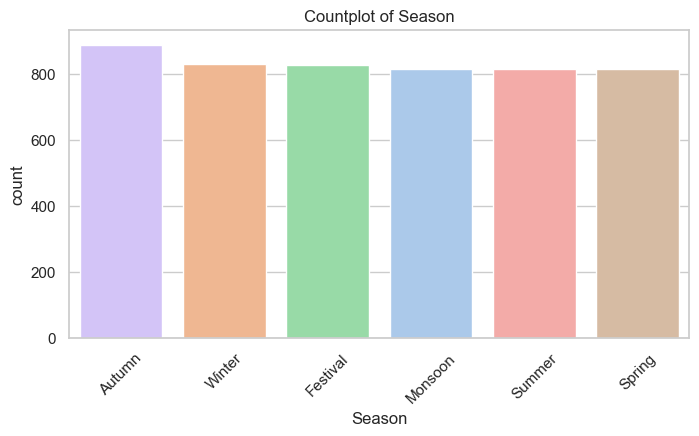

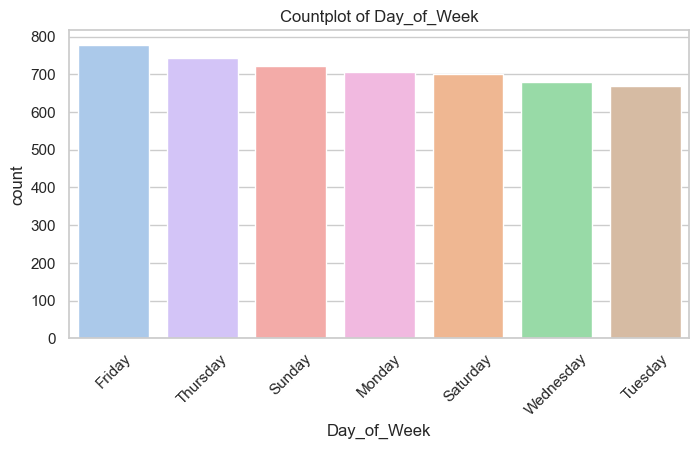

In [19]:
# Categorical distributions
categorical_cols = ['Category', 'Demand_Level', 'Season', 'Day_of_Week']

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=df[col], order=df[col].value_counts().index, hue=df[col], palette='pastel', legend=False)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.show()

## Feature Engineering

In [20]:
# Simulate Cost per Unit (50%-80% of Current Price)
df['Cost_per_Unit'] = (df['Current_Price'] * np.random.uniform(0.5, 0.8, len(df))).round(2)

# Calculate Profit
df['Profit'] = ((df['Current_Price'] - df['Cost_per_Unit']) * df['Units_Sold']).round(2)

In [21]:
# Price difference and ratio
df['Price_Diff'] = (df['Current_Price'] - df['Competitor_Price']).round(2)

df['Price_Ratio'] = (df['Current_Price'] / (df['Competitor_Price'] + 1e-5)).round(2)

In [22]:
# Map Demand_Level to numeric
demand_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Demand_Level_Num'] = df['Demand_Level'].map(demand_mapping)

In [23]:
# Price × Demand interaction
df['Price_Demand_Interaction'] = (df['Current_Price'] * df['Demand_Level_Num']).round(2)

In [24]:
# Log transforms of prices
df['Log_Current_Price'] = np.log1p(df['Current_Price']).round(2)

df['Log_Competitor_Price'] = np.log1p(df['Competitor_Price']).round(2)

In [25]:
# Drop unnecessary columns if needed
df.drop(columns=['Rating', 'Demand_Level_Num'], inplace=True)

In [26]:
# Check first few rows of new features
df.head()

,Product_ID,Category,Current_Price,Competitor_Price,Demand_Level,Season,Day_of_Week,Units_Sold,Stock,Cost_per_Unit,Profit,Price_Diff,Price_Ratio,Price_Demand_Interaction,Log_Current_Price,Log_Competitor_Price
0,P1000,Clothing,916.51,1376.46,High,Monsoon,Friday,82,863,722.05,15945.72,-459.95,0.67,2749.53,6.82,7.23
1,P1001,Sports,587.32,1692.79,Low,Winter,Saturday,21,388,367.71,4611.81,-1105.47,0.35,587.32,6.38,7.43
2,P1002,Toys,1262.98,495.52,Low,Festival,Wednesday,179,470,872.21,69947.83,767.46,2.55,1262.98,7.14,6.21
3,P1003,Clothing,1985.26,1739.53,Low,Summer,Sunday,498,65,1368.07,307360.62,245.73,1.14,1985.26,7.59,7.46
4,P1004,Home Appliances,803.33,114.98,High,Autumn,Thursday,398,816,422.89,151415.12,688.35,6.99,2409.99,6.69,4.75


In [27]:
# Save to CSV
df.to_csv("../data/cleaned/engineered_dynamic_pricing_data.csv", index=False)

print("Cleaned and processed data saved successfully.")

Cleaned and processed data saved successfully.


## Training A Preprocessor Model (Feature Pipeline)

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import joblib

In [29]:
# Define features 
numerical_columns = [
    'Current_Price', 'Competitor_Price', 'Stock', 
    'Price_Diff', 'Price_Ratio', 'Price_Demand_Interaction', 
    'Log_Current_Price', 'Log_Competitor_Price', 'Cost_per_Unit'
]

# categorical_cols = ['Category', 'Demand_Level', 'Season', 'Day_of_Week']

In [30]:
# Separate features and target
X = df[numerical_columns + categorical_cols]
y = df["Profit"]

In [31]:
# Split into train/test
# X is your feature DataFrame (with engineered columns present), y is Profit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Preprocessing pipeline
# One-Hot Encode categorical columns and scale numeric columns
# Preprocessing pipeline remains the same

preprocessor = ColumnTransformer(transformers=[
    # scale numeric columns except target
    ('num', StandardScaler(), numerical_columns),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

In [33]:
# Fit and transform

# fits and transforms training data in one step 
# X_train_processed = preprocessor.fit_transform(X_train)

# Train the preprocessor only on training data
preprocessor.fit(X_train)

# Fit preprocessor on training data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Preprocessing complete.")
print("Processed feature shape:", X_train_processed.shape)

Preprocessing complete.
Processed feature shape: (4000, 32)


In [34]:
# Save the preprocessor
joblib.dump(preprocessor, "../models/preprocessor.pkl")

['../models/preprocessor.pkl']

## Model Selection & Training

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

In [36]:
'''
Models Included:

Linear Regression – baseline linear model.

Random Forest Regressor – robust tree ensemble baseline.

Gradient Boosting Regressor – boosting-based model.

AdaBoost Regressor – boosting with simple base learners.

XGBoost Regressor – high-performing for tabular regression.

Decision Tree Regressor – simple interpretable tree.
'''

'\nModels Included:\n\nLinear Regression – baseline linear model.\n\nRandom Forest Regressor – robust tree ensemble baseline.\n\nGradient Boosting Regressor – boosting-based model.\n\nAdaBoost Regressor – boosting with simple base learners.\n\nXGBoost Regressor – high-performing for tabular regression.\n\nDecision Tree Regressor – simple interpretable tree.\n'

In [37]:
# Define models
models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=200, learning_rate=0.1, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42, objective='reg:squarederror'),
    "DecisionTree": DecisionTreeRegressor(random_state=42)
}

In [38]:
# Train all models and keep in a dictionary
trained_models = {}
for name, model in models.items():
    model.fit(X_train_processed, y_train)
    trained_models[name] = model

print("All 6 models trained and ready for evaluation in Stage 7!")

All 6 models trained and ready for evaluation in Stage 7!


## Model Evaluation

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [40]:
# Dictionary to store evaluation metrics
evaluation_results = []

# Evaluate each trained model
for model_name, model in trained_models.items():
    y_pred = model.predict(X_test_processed)  # Preprocessed test data
    
    # Compute RMSE manually
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    evaluation_results.append({
        'Model': model_name,
        'RMSE': round(rmse, 2),
        'MAE': round(mae, 2),
        'R2': round(r2, 2)
    })

In [41]:
# Comparison table
eval_df = pd.DataFrame(evaluation_results).sort_values(by='RMSE', ascending=True).reset_index(drop=True)
print("Model Comparison:\n")
print(eval_df)

Model Comparison:

              Model      RMSE       MAE    R2
0  LinearRegression  61417.80  44975.68  0.43
1          AdaBoost  63292.43  46982.14  0.39
2      RandomForest  63887.83  45764.12  0.38
3  GradientBoosting  64076.15  46597.41  0.38
4           XGBoost  65231.82  46605.43  0.36
5      DecisionTree  85015.99  58563.92 -0.09


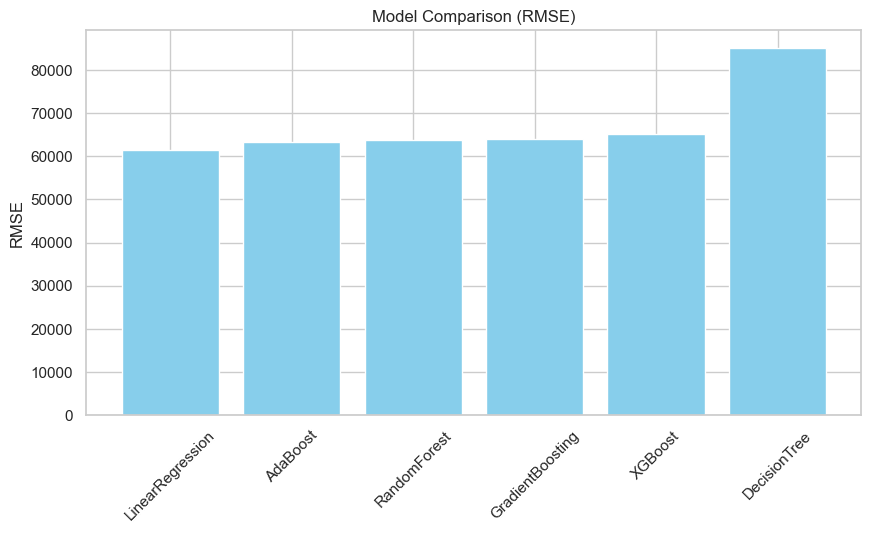

In [42]:
plt.figure(figsize=(10,5))
plt.bar(eval_df.index, eval_df['RMSE'], color='skyblue')
plt.xticks(eval_df.index, eval_df['Model'], rotation=45)
plt.title("Model Comparison (RMSE)")
plt.ylabel("RMSE")
plt.show()

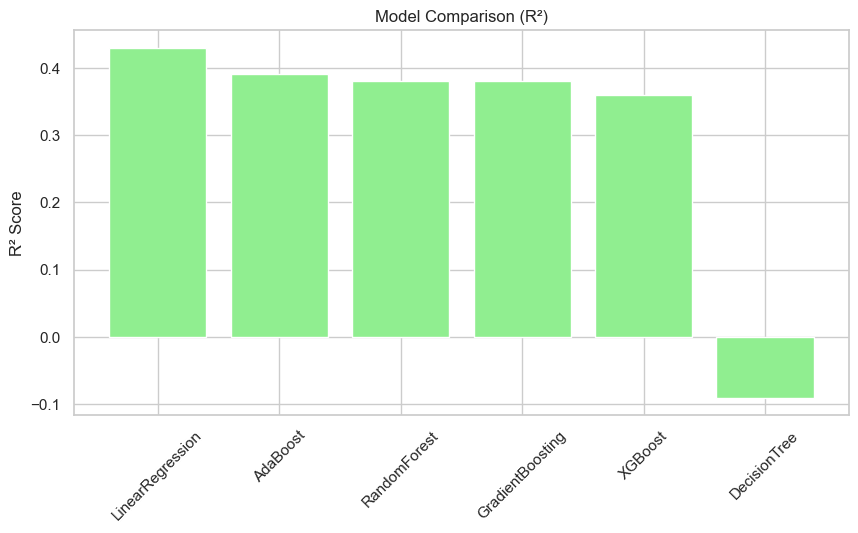

In [43]:
plt.figure(figsize=(10,5))
plt.bar(eval_df.index, eval_df['R2'], color='lightgreen')
plt.xticks(eval_df.index, eval_df['Model'], rotation=45)
plt.title("Model Comparison (R²)")
plt.ylabel("R² Score")
plt.show()

In [44]:
# Generate key insights from eval_df
best_model = eval_df.iloc[0]
worst_model = eval_df.iloc[-1]

insights = []

insights.append(f"{worst_model['Model']} has the highest error (RMSE = {worst_model['RMSE']}, MAE = {worst_model['MAE']}).")

# Compare intermediate models
if len(eval_df) > 2:
    for i in range(1, len(eval_df)-1):
        model = eval_df.iloc[i]
        prev_model = eval_df.iloc[i-1]
        insights.append(f"{model['Model']} is better than {prev_model['Model']}, but slightly worse than {eval_df.iloc[i+1]['Model']}.")

insights.append(f"{best_model['Model']} has the lowest RMSE and MAE → best model for predicting Profits.")

# Print insights
print("Key Insights:\n")
for insight in insights:
    print(insight)

Key Insights:

DecisionTree has the highest error (RMSE = 85015.99, MAE = 58563.92).
AdaBoost is better than LinearRegression, but slightly worse than RandomForest.
RandomForest is better than AdaBoost, but slightly worse than GradientBoosting.
GradientBoosting is better than RandomForest, but slightly worse than XGBoost.
XGBoost is better than GradientBoosting, but slightly worse than DecisionTree.
LinearRegression has the lowest RMSE and MAE → best model for predicting Profits.


In [45]:
def get_feature_names(column_transformer):
    feature_names = []
    
    for name, transformer, cols in column_transformer.transformers_:
        if name != 'remainder':
            if hasattr(transformer, 'get_feature_names_out'):
                # e.g., OneHotEncoder
                names = transformer.get_feature_names_out(cols)
                feature_names.extend(names)
            else:
                feature_names.extend(cols)
    return feature_names

processed_features = get_feature_names(preprocessor)

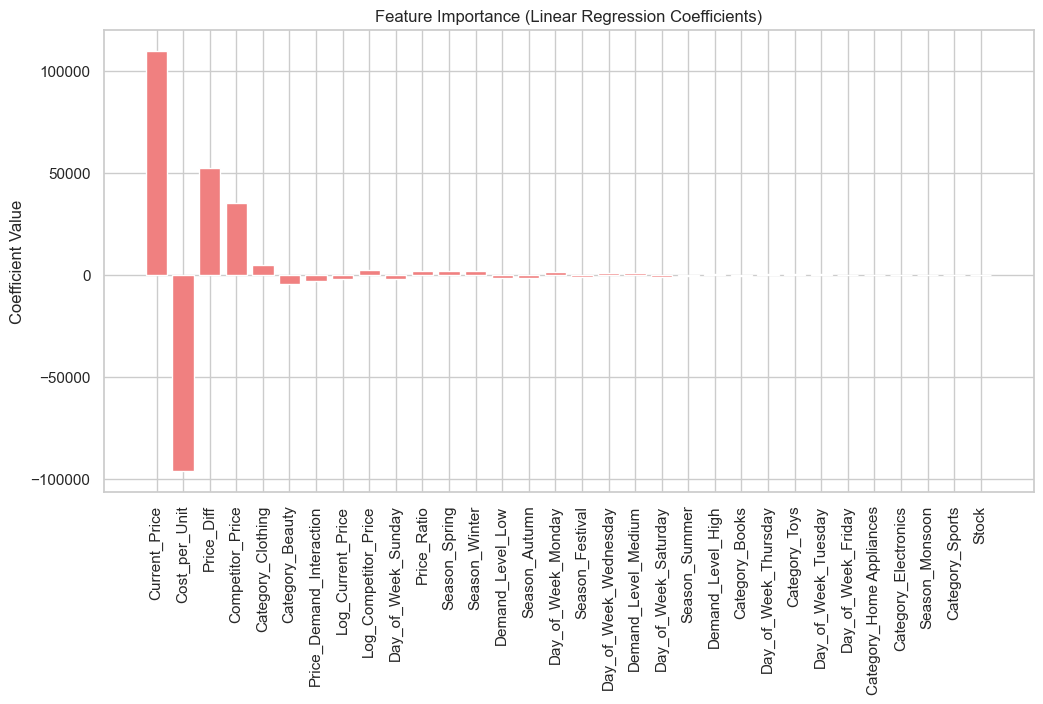

In [46]:
# Get the name of the best model
best_model_name = best_model['Model']

# Retrieve the actual trained model object
best_model_obj = trained_models[best_model_name]

# Now create DataFrame with correct lengths
coef = best_model_obj.coef_
coef_df = pd.DataFrame({'Feature': processed_features, 'Coefficient': coef})
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

# Plot
plt.figure(figsize=(12,6))
plt.bar(coef_df['Feature'], coef_df['Coefficient'], color='lightcoral')
plt.xticks(rotation=90)
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.ylabel("Coefficient Value")
plt.show()

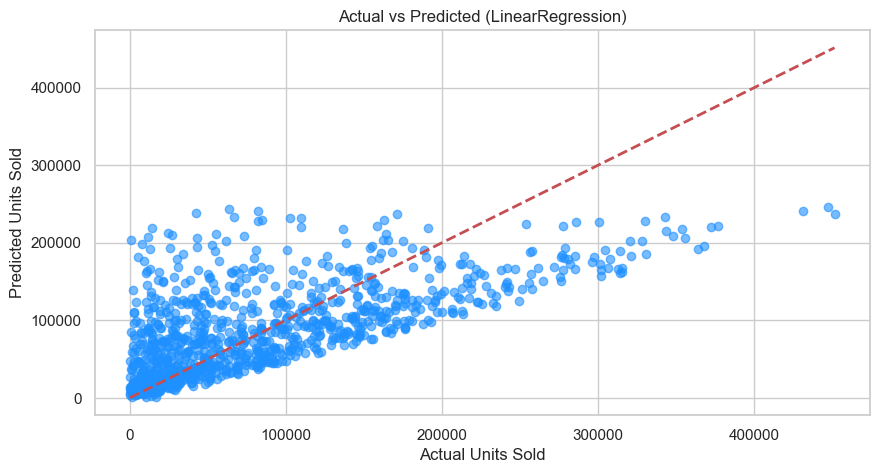

In [47]:
# Visualize Actual vs Predicted (XGBoost)

y_pred_best = best_model_obj.predict(X_test_processed)

plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_best, alpha=0.6, color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")
plt.title(f"Actual vs Predicted ({best_model['Model']})")
plt.show()

# Red dashed line: perfect predictions

# Scatter points around line: prediction accuracy

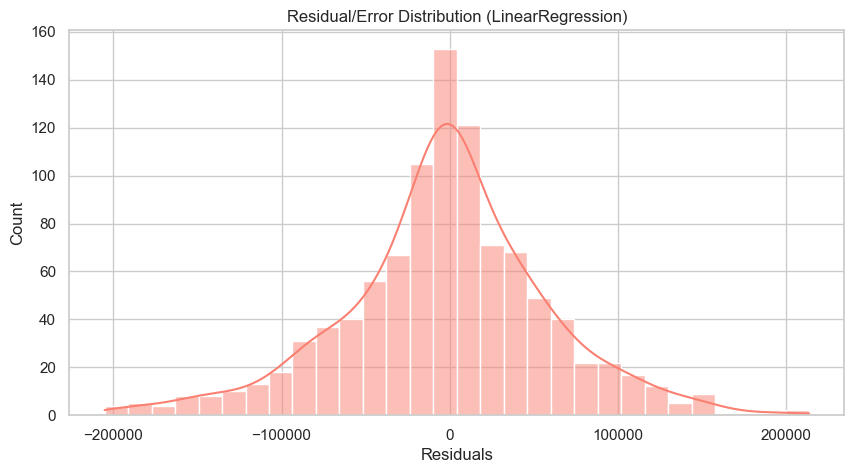

In [48]:
# Residual Analysis (Error Distribution)

residuals = y_test - y_pred_best
plt.figure(figsize=(10,5))
sns.histplot(residuals, bins=30, kde=True, color='salmon')
plt.title(f"Residual/Error Distribution ({best_model['Model']})")
plt.xlabel("Residuals")
plt.show()

# Helps identify biases or patterns in errors

In [49]:
# Simulate Business Impact

# For a dynamic pricing system, you might want to see how price changes affect revenue:

# Simulate Revenue Impact
test_results = X_test.copy()
test_results['Actual_Units_Sold'] = y_test
test_results['Predicted_Units_Sold'] = y_pred_best
test_results['Revenue_Actual'] = round(test_results['Actual_Units_Sold'] * test_results['Current_Price'], 2)
test_results['Revenue_Predicted'] = round(test_results['Predicted_Units_Sold'] * test_results['Current_Price'], 2)

total_actual_revenue = round(test_results['Revenue_Actual'].sum(),2)
total_predicted_revenue = round(test_results['Revenue_Predicted'].sum(),2)
total_difference = round(total_actual_revenue - total_predicted_revenue,2)

print(f"Total Actual Revenue: {total_actual_revenue}")
print(f"Total Predicted Revenue: {total_predicted_revenue}")
print(f"Difference Between Actual and Predicted Revenue: {total_difference}")

# Helps estimate potential revenue impact of your AI-driven pricing decisions.

Total Actual Revenue: 112475789468.41
Total Predicted Revenue: 116838256515.59
Difference Between Actual and Predicted Revenue: -4362467047.18


In [50]:
# Save the model

best_model_obj = trained_models[best_model['Model']]
joblib.dump(best_model_obj, "../models/LinearReg.pkl")

print(f"Saved best model: {best_model['Model']} as 'LinearReg.pkl'")

Saved best model: LinearRegression as 'LinearReg.pkl'


## Stage 8: Deployment & Dashboarding

## Stage 9: Monitoring & Iteration